<a href="https://colab.research.google.com/github/gianerr/CSST-102/blob/main/3B_PLATA_MP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Exploration and Preprocessing

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [150]:
data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

In [151]:
print(data.head())
print(data.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

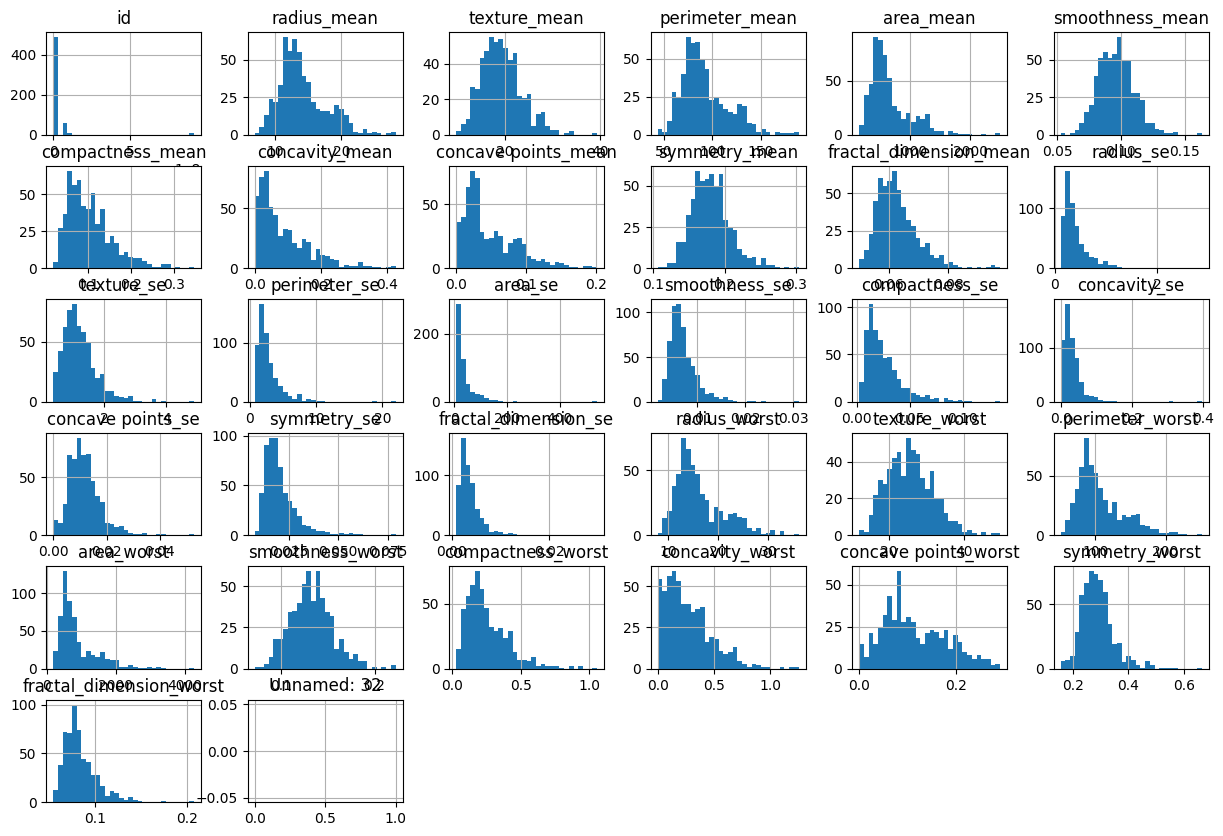

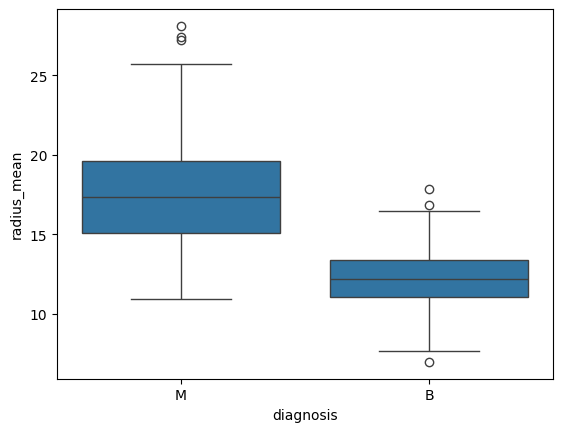

In [152]:
data.hist(bins=30, figsize=(15, 10))
plt.show()

sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.show()

In [153]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [154]:
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [155]:
scaler = MinMaxScaler()
features = data.drop(['id', 'diagnosis'], axis=1)
scaled_features = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [156]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['diagnosis'], test_size=0.2, random_state=42)

# 2. Model Development

In [157]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train)

knn_predictions = knn.predict(X_test_imputed)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(classification_report(y_test, knn_predictions))

KNN Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [158]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_imputed, y_train)

log_reg_predictions = log_reg.predict(X_test_imputed)

log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")
print(classification_report(y_test, log_reg_predictions))

Logistic Regression Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [159]:
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_predictions))

KNN Confusion Matrix:
[[69  2]
 [ 2 41]]
Logistic Regression Confusion Matrix:
[[71  0]
 [ 2 41]]


# 3. Model Evaluation

In [160]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)

print("KNN Model Evaluation:")
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1 Score: {knn_f1:.2f}")
print("Confusion Matrix:\n", knn_confusion_matrix)

log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_precision = precision_score(y_test, log_reg_predictions)
log_reg_recall = recall_score(y_test, log_reg_predictions)
log_reg_f1 = f1_score(y_test, log_reg_predictions)
log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_predictions)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {log_reg_accuracy:.2f}")
print(f"Precision: {log_reg_precision:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"F1 Score: {log_reg_f1:.2f}")
print("Confusion Matrix:\n", log_reg_confusion_matrix)

KNN Model Evaluation:
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Confusion Matrix:
 [[69  2]
 [ 2 41]]

Logistic Regression Model Evaluation:
Accuracy: 0.98
Precision: 1.00
Recall: 0.95
F1 Score: 0.98
Confusion Matrix:
 [[71  0]
 [ 2 41]]


# 4. Report and Visualizations

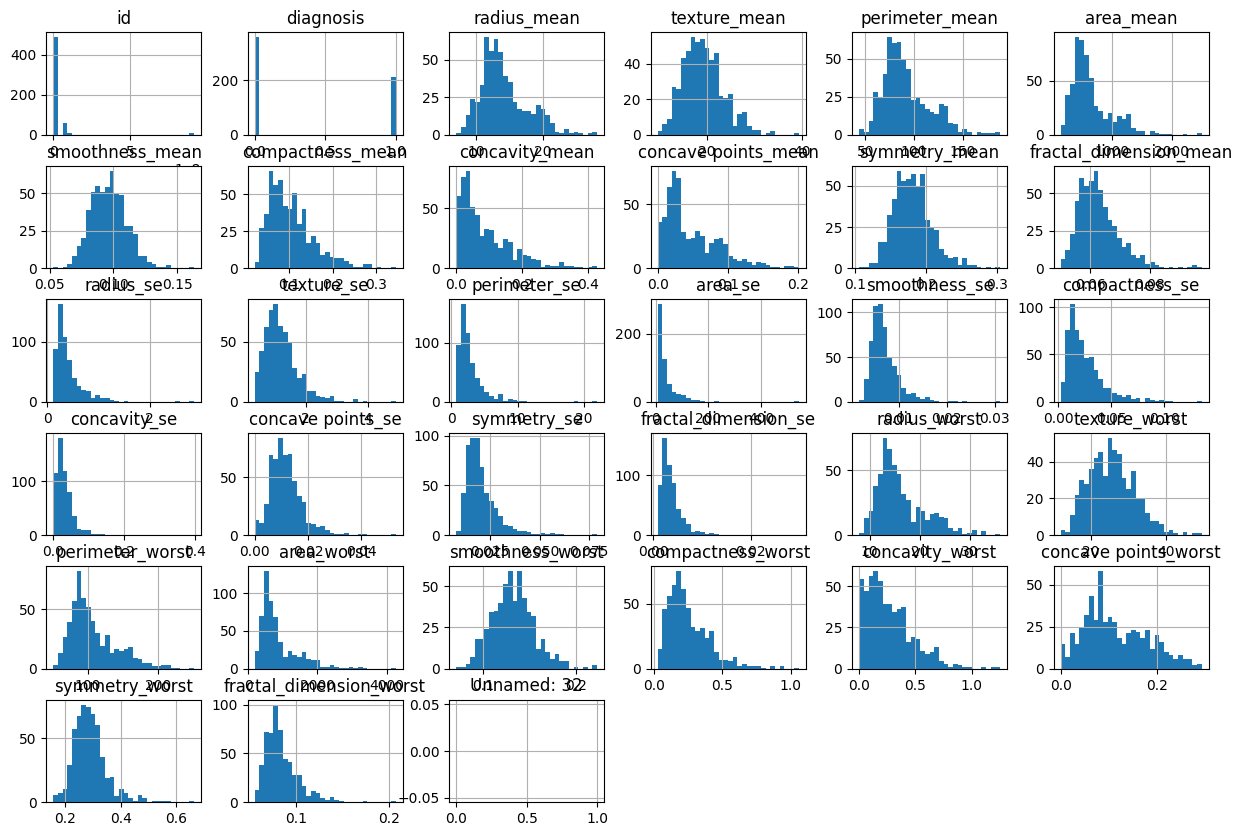

In [161]:
data.hist(bins=30, figsize=(15, 10))
plt.show()

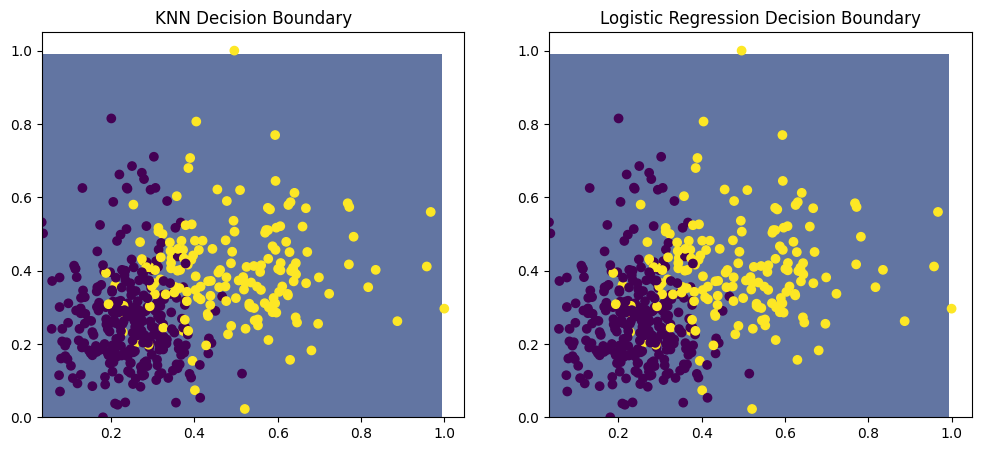

In [164]:
X_plot = X_train[:, :2]
y_plot = y_train

xx, yy = np.meshgrid(np.arange(X_plot[:, 0].min(), X_plot[:, 0].max(), 0.01),
                     np.arange(X_plot[:, 1].min(), X_plot[:, 1].max(), 0.01))

Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], 28))])
Z_log_reg = log_reg.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], 28))])

Z_knn = Z_knn.reshape(xx.shape)
Z_log_reg = Z_log_reg.reshape(xx.shape)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_knn, alpha=0.8)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot)
plt.title("KNN Decision Boundary")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_log_reg, alpha=0.8)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot)
plt.title("Logistic Regression Decision Boundary")

plt.show()